# **Group 11 Survey Report**

## **Introduction**
---
---
This report concerns the use and societal implications of social media with regard to education. We aim to gather insightful data through well-constructed research questions and surveys. We greatly improved our understanding by reviewing research articles related to social media impacts. (Appendix A)

We were to discover patterns and deduct conclusions about the relationship between social media and education. As students and regular social media users, we were interested and motivated to explore and research this appealing subject matter.

In terms of population, the targeted respondents are all students across the computing department, the majority being students enrolled in Data Visualisation and the Web.


**Research questions:** 
>- How is social media affecting your academic performance?  
>- How is the use of social media affecting your focus levels?   
>- To what extent the use of social media influences people’s thinking about future careers?  
>- How is social media affecting your ability to access career opportunities?   
>- How do people think social media performs in terms of educational advertisement?   

**Scope and limitations:**
>-   Respondents only from computing department
>-   Only one survey response per person
>-   Time constraint (report due on 15-11-2020)


**Domain concepts:**  
>Education: instruction and learning relative to university studies only.  
Social media: websites/application that enable content sharing and engagement online. Advertisement: Digital announcements or product promotions.


---






## **Survey Design**
---
---
**Description of the structure**  
The first three questions of our survey are the demographics of age, gender, and education. Asking these questions enabled us to view the distribution of demographic characteristics and differentiate between different sub-groups of survey participants. Our survey was conducted online and left anonymous reducing the potential of response bias because the questions were self-administered. Order bias was tackled by grouping similar topic questions together making it easier for respondents to focus on one concept before moving onto the next thus enhancing the response quality.
>**[forms.gle/PwS4qmS9pHPVyBxk9](https://forms.gle/PwS4qmS9pHPVyBxk9)**  
 

**Operational definitions**  
We presented closed-ended questions with predetermined answers covering each potential response without overlapping.  Asterisks were used to mark required fields to improve usability of our survey and by using neutral words, we tried to avoid leading participants towards certain options.  Our survey consisted of multi-question grids to gather clean data which is easy to analyse or experiment on. We were able to analyse psychographics on a numerical scale such as level of satisfaction with interval scale questions. Ordinal scale questions enabled us to view how much a participant agrees/disagrees with a given statement or question.

---




**Key variables**: Demographic variables are all regarded as important variables to plot against to derive statements. On top of this, there are other variables such as rate of study delay – useful for aggregating categories. Number of social media and hours of daily usage can all be used as variables in categorical-numerical graphs such as box plots and cat plots.

**Overview of demographics data** : The survey collected data for age, gender, current level of education and specific course as an optional. The demographic data produces an insight into who is actually taking our survey, most demographic representations are showing frequency and count.

## **Demographics**
---
---



**Importing**

In [45]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt

# We will use the same colours across all graphs
# chosen names of colors supported in matplotlib
colour_scale = [ 'firebrick','lightcoral','thistle','lightskyblue', 'dodgerblue']
colour_scale_b = ['firebrick','lightcoral', 'thistle', 'lightskyblue', 'dodgerblue','tab:blue']

In [46]:
# function for likert scale
def likert(df_likert):
    lk_col = [ 'white', 'firebrick','lightcoral','thistle','lightskyblue', 'dodgerblue']
    # adds frequency of strongly disagree+disagree+half of neutral and finds the middle
    mid = df_likert.iloc[:,[0,1]].sum(axis=1)+df_likert.iloc[:,2]*.5 
    longest = mid.max() # finds the largest value so longest on the LHS
    # mid - longest = fills in the gap between bar and yaxis
    # inserts value as a column at the start
    df_likert.insert(0, 'Null', (mid - longest).abs())
    # plots as a stacked horizontal barchart, and mid - longest is coloured white
    df_likert.plot.barh(stacked=True, color=lk_col, edgecolor='none', fontsize=12,figsize=(10,6),legend=True)
    # adding a dashed lne through the centre and sending line to back
    z = plt.axvline(longest, linestyle='--', color='black', alpha=.5)
    z.set_zorder(-1)
    plt.xlim(0, longest*2)
    # resets labels starting with negative to positive, with mid value same as longest
    xval = np.arange(0,longest*2+5,5)
    xlabels = [str(x-longest-0.5) for x in xval]
    plt.xticks(xval, xlabels)
# call it like following
# df_plot_likert = df.copy()
# likert(df_plot_likert)
# plt.show()

In [47]:
demo = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',
                   dtype = {
                        'gender':'category',
                        'degree':'category',
                        'education':'category'},
                   usecols = 'B, C, E, F'
                  )
demo.head(3).append(demo.tail(3))

,age,gender,education,degree
0,21,Female,Undergraduate degree programme,BSc Creative Computing
1,21,Male,Undergraduate degree programme,BSc Computer Science
2,21,Female,Undergraduate degree programme,BSc Computer Science
13,22,Female,Undergraduate degree programme,BSc Computer Science
14,20,Female,Undergraduate degree programme,BSc Creative Computing
15,21,Male,Undergraduate degree programme,BSc Computer Science


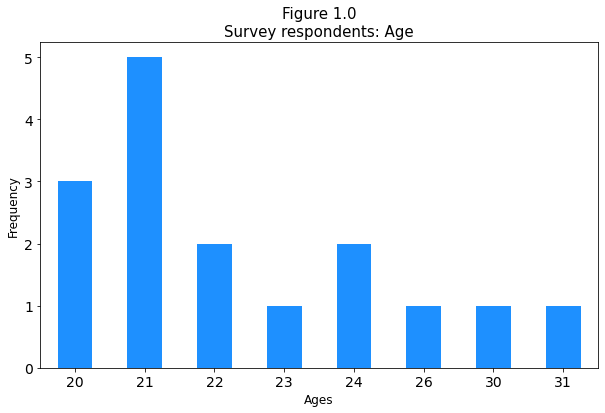

In [48]:
ax = demo['age'].value_counts(sort = False).plot.bar(rot=0, 
                                                     fontsize=14,
                                                     color = colour_scale[4],
                                                     figsize=(10,6))

ax.set_xlabel('Ages', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
ax.set_title('Figure 1.0\nSurvey respondents: Age',fontsize=15)
plt.show()

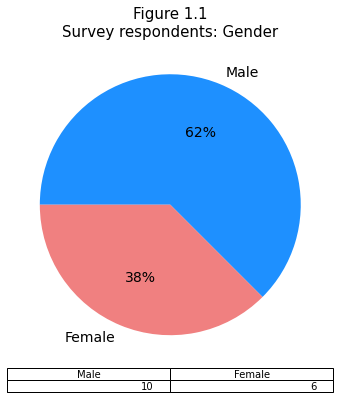

In [49]:
ax = demo['gender'].value_counts().plot.pie(autopct='%1.0f%%',
                                          startangle=180,
                                          counterclock=False, 
                                          label='',
                                          table=True,
                                          fontsize=14,
                                          colors = [colour_scale[4],colour_scale[1]],
                                          figsize=(10,6))
ax.set_title('Figure 1.1\nSurvey respondents: Gender', fontsize=15)
plt.show()

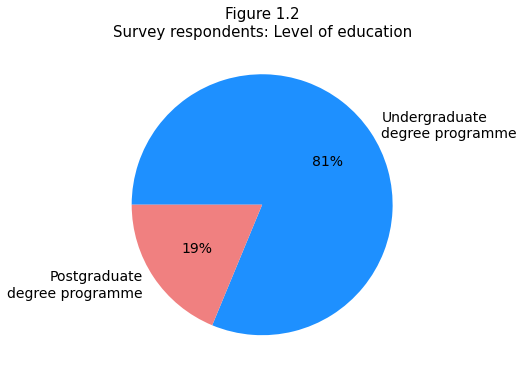

In [50]:
ax = demo['education'].value_counts().plot.pie(autopct='%1.0f%%',
                                            startangle=180,
                                            counterclock=False, 
                                            label = '',
                                            labels = ['Undergraduate\ndegree programme',
                                                      'Postgraduate\ndegree programme'],
                                            fontsize=14,
                                            colors = [colour_scale[4],colour_scale[1]],
                                            figsize=(10,6))
ax.set_title('Figure 1.2\nSurvey respondents: Level of education', fontsize=15)
plt.show()

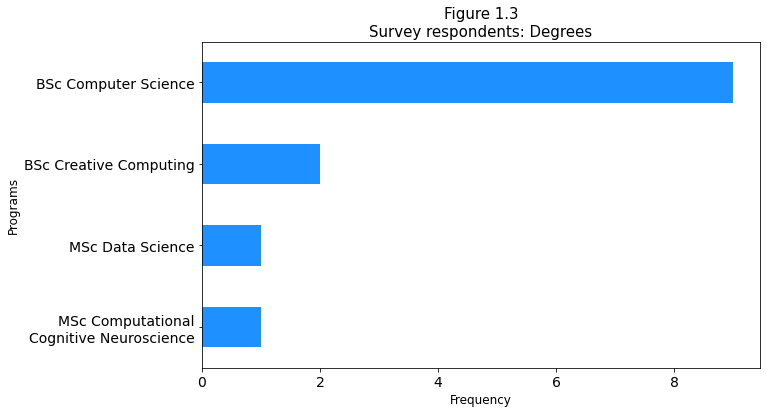

In [51]:
ax = demo['degree'].value_counts(sort=True).plot.barh(fontsize=14,
                                                      color = colour_scale[4],
                                                      figsize=(10,6))
ax.invert_yaxis()
ax.set_yticklabels(['BSc Computer Science',
                    'BSc Creative Computing',
                    'MSc Data Science',
                    'MSc Computational\nCognitive Neuroscience'])

ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('Programs', fontsize=12)
ax.set_title('Figure 1.3\nSurvey respondents: Degrees', fontsize=15)
plt.show()

>**Overview of data** : The survey that included this research question received a total of **16 responses**. **63%** of which are male and **81%** of responses are undergraduate students. Most frequent ages are **20 and 21**, most respondents are on a **BSc Computer Science degree**.

## **Research Questions**


---



---



### **1. How is social media affecting your academic performance?**


---


#### **How many social media accounts do you have?**

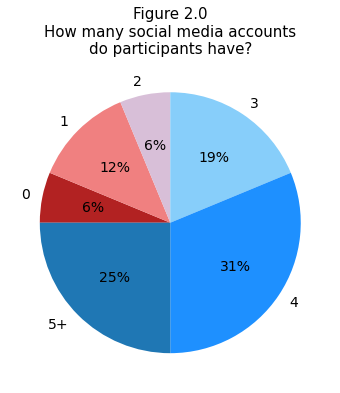

In [52]:
res1 = pd.read_excel('Survey_Data_Vis.xlsx', #the dataframe has been called res1 
                   sheet_name = 'responses', #sheet name is called responses in our xlsx imported from Google Forms 
                   usecols = 'B, C, D, E, G, H, I, J', #Relevant columns required for plotting 
                     )
#print(res1.head(3).append(res1.tail(3))) #uncomment and run this cell to visualise dataset
#Variable named res 1 indicating research question 1 - How is social media affecting you academic performance
cat = [0,1,2,3,4,'5+']
res1['sm_sites'] = pd.Categorical(res1['sm_sites'],
                                  categories = cat, ordered = True)
ax = res1['sm_sites'].value_counts(sort=False).plot.pie(autopct='%1.0f%%', #regulating the percentage size
                                            startangle=180, # rotates the start of the pie chart by angle degrees counterclockwise
                                            counterclock=False, #no fractional direction 
                                            label='', 
                                            figsize = (10,6), #general size of the chart
                                            colors=colour_scale_b, #using set of colours defined in the import
                                            fontsize=14) #size of the font 
ax.set_title('Figure 2.0\nHow many social media accounts\ndo participants have?', fontsize=15)
plt.show()

>**Figure 2.0** shows that most respondents have at least 1 social media account. **56%** of respondents have **4+ accounts**.  
The percentages above are indicative. Pandas is rounding them due to the nature of the data to a total 99% instead of 100%


#### **How much time do you spend on social media per day?**

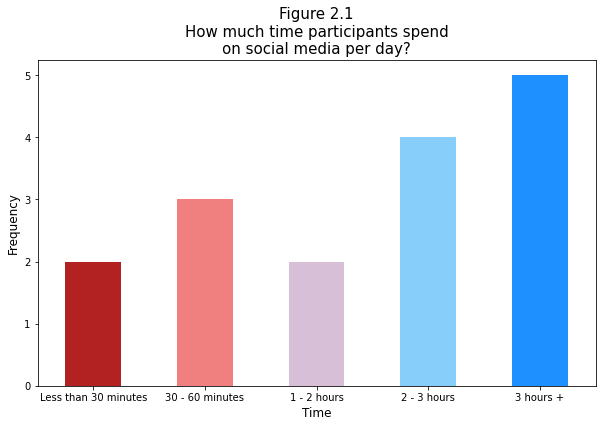

In [53]:
#Ordinal: the natural order from smallest to biggest
res1['sm_hours'] = pd.Categorical(res1['sm_hours'],
                                  categories = ['Less than 30 minutes', '30 - 60 minutes', 
                                                '1 - 2 hours', '2 - 3 hours', 
                                                '3 hours +' ], ordered = True) 
#Ordinal data from smallest to biggest
ax = res1['sm_hours'].value_counts(sort = False).plot.bar(rot=0, fontsize=10, 
                                                          figsize = (10,6), 
                                                          color = colour_scale)# settin bar plot charachteristics 
ax.set_xlabel('Time', fontsize = 12) #x label
ax.set_ylabel('Frequency', fontsize = 12) #y label
ax.set_title(
    'Figure 2.1\nHow much time participants spend\non social media per day?', 
    fontsize=15) #title defined
plt.show() #function to display plot via matplotlib library

>Most respondents (**9/16 respondents**) use their platforms for 2 hours or longer - most people from this sample spend longer daily lengths of time on social media.

#### **Do you agree or disagree with the following statement: "I feel like spending less time on social media can improve my university marks."**

In [54]:
#create dataframe and get data from spreadsheet
df_marks = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',                    
                   usecols = 'I')
df_marks = df_marks.melt(var_name="uni_marks", value_name='agreement')

#Data has been gathered as numerical values
#For the purpose of visualisations, numerical data will be converted to 
#ordinal likert scale using pd.astype into categroies
labelA = [1, 2, 3, 4, 5]
labelB = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
df_marks['agreement'] = df_marks['agreement'].astype(pd.CategoricalDtype(
                                                     categories = labelA,
                                                     ordered = True))

mark_table = pd.crosstab(df_marks['uni_marks'], df_marks['agreement'])
mark_table.insert(0, 1, 0)# 1/Strongly Disagree was null so did not appear in rows
mark_table.columns = labelB
#mark_table 
#uncomment the previous line to check a count cross tab about the 
#new adjusted labels for the upcoming visualisation

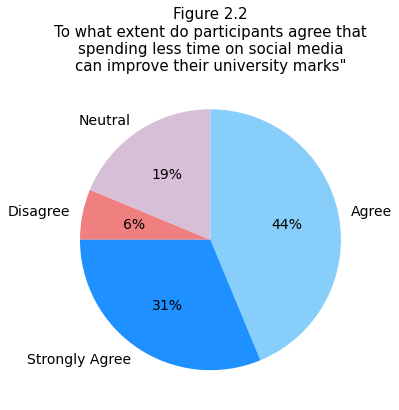

In [55]:
#Statement agreement plotting code
ax = mark_table.iloc[0,:].plot.pie(label='',
                                   autopct = lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '',
                                   startangle=180, 
                                   counterclock=False,
                                   figsize = (12,6),
                                   fontsize=14,
                                   #pctdistance= 0.5, labeldistance=1.2 : experimenting with different parameters
                                   colors = colour_scale) 
ax.set_title(
'Figure 2.2\nTo what extent do participants agree that\nspending less time on social media\ncan improve their university marks"', 
fontsize = 15)
plt.show()

>**75% of respondents** either agree or strongly agree indicating a high level of self-consciousness that less social media usage could mean higher marks.

#### **How satisfied do you feel with the grades you have obtained so far in your current level of education?**

In [56]:
#loading dataframe and relevant columns 
df_satisfa = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',                    
                   usecols = 'J')
df_satisfa = df_satisfa.melt(var_name="grade_sat", value_name='satisfaction')


#Same issue as Figure 1.3 - The labels are converted from 
#numerical values to categorical (ordinal) values in this graph as well
labelA = [1, 2, 3, 4, 5]
labelB = ['Very unsatified', 'Unsatisfied', 'Neutral', 'Satisfied', 'Strongly Satisfied']
df_satisfa['satisfaction'] = df_satisfa['satisfaction'].astype(pd.CategoricalDtype(
                                                     categories = labelA,
                                                     ordered = True))
mark_table2 = pd.crosstab(df_satisfa['grade_sat'], df_satisfa['satisfaction'])
mark_table2.columns = labelB
#mark_table2
#Uncomment mark table to visualise cross tab with appropriate labels for 
#upcoming visualisations

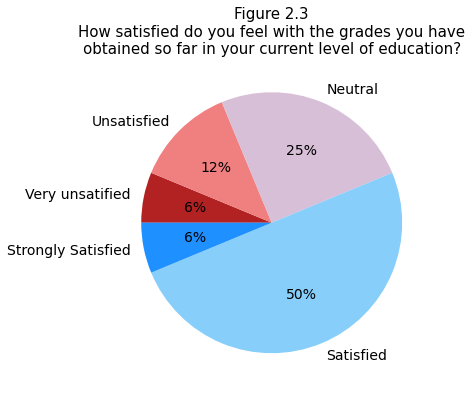

In [57]:
#Plotting grade satisfaction
ax = mark_table2.iloc[0,:].plot.pie(label='',
                                   #fontsize = 14,autopct='%1.0f%%',
                                   autopct = lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '',
                                   startangle=180,
                                   counterclock=False,
                                   figsize = (10,6),
                                   fontsize=14,
                                   #pctdistance= 0.5, labeldistance=1.2 
                                   colors = colour_scale)
ax.set_title('Figure 2.3\nHow satisfied do you feel with the grades you have\nobtained so far in your current level of education?', 
             fontsize=15)
plt.show()

##### **Box plot: Usage time and satisfaction**


**Key for upcoming plots:**  
Satisfaction rating & meaning

- 1 = Not at all satisfied 
- 2 = Slightly satisfied
- 3 = Neutral 
- 4 = Satisfied
- 5 = Extremely satisfied

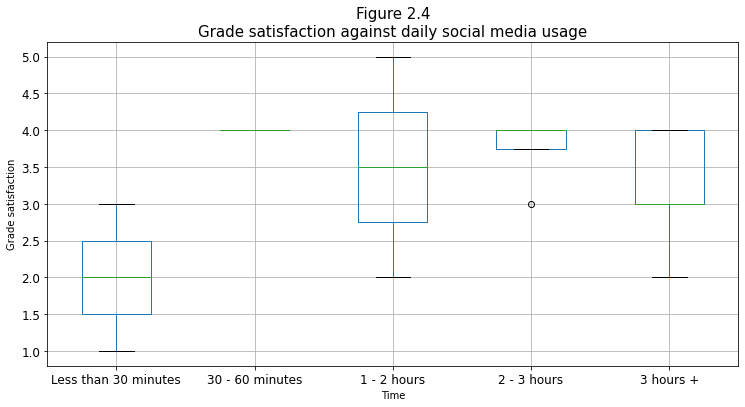

In [58]:
res4 = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',
                   usecols = ['sm_hours', 'grade_sat'])
#print(res4)
#print(res4.dtypes)# Making sure that the data types are fit for a box plot: categorical and numerical

#Set category names and order
res4['sm_hours'] = pd.Categorical(res4['sm_hours'],
                                  categories = ['Less than 30 minutes', '30 - 60 minutes', 
                                                '1 - 2 hours', '2 - 3 hours', 
                                                '3 hours +' ], ordered = True)
# Calculate the median age.
median_value = res4.groupby('sm_hours').median().sort_values(
by='grade_sat', ascending=False)
# Create a new data type where platforms are ordered by median age.
ordered_platform_dtype = pd.CategoricalDtype(median_value.index, ordered=True)
# Assign new ordered categorical dtype.
res4['sm_hours'] = res4['sm_hours'].astype(ordered_platform_dtype)
ax = res4.boxplot(by='sm_hours',fontsize=12, figsize = (12,6))
ax.set_title('Figure 2.4\nGrade satisfaction against daily social media usage',fontsize=15)
ax.figure.suptitle('')
ax.set_xlabel('Time')
ax.set_ylabel('Grade satisfaction')
plt.show()

In [59]:
#Function to calculate overall skewness
def plot_skew():
      return res4['grade_sat'].skew().round(2)
plot_skew()
#Skewness of box plot = -0.89 indicating a negative value
#This indicates that the value tends more towards the "tail" of data

-0.89

>- **1 - 2 hours** has largest data distribution, **30 – 60 minutes** has no distribution (only median **satisfaction = 4**). 
>- Outliers present in **2 – 3 hours** category where **satisfaction = 3**.
>- **1 – 2 hours** box plot has highest Interquartile range 
>- Negative overall skewness (**-0.89**)



##### **Cat plot: Age and number of social accounts**




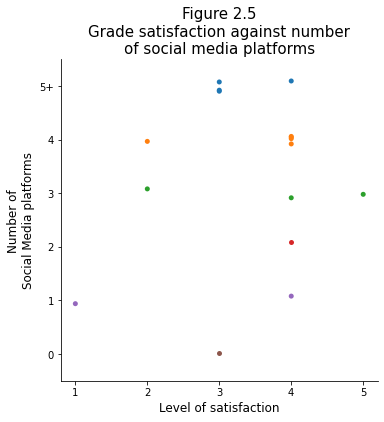

In [60]:
res3 = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',
                   usecols = 'G,J')
#print(res3)
res3['sm_sites'] = res3['sm_sites'].astype('category')

# Calculate the median age of each group for ordering categories.
median_age = res3.groupby('sm_sites').median().sort_values(
by='grade_sat', ascending=True)
g = sb.catplot(x='grade_sat', y='sm_sites', data=res3, order=['5+',4,3,2,1,0])
g.ax.set_title('Figure 2.5\nGrade satisfaction against number\nof social media platforms',fontsize=15)
g.ax.set_ylabel('Number of\nSocial Media platforms',fontsize=12)
g.ax.set_xlabel('Level of satisfaction',fontsize=12)
plt.xticks([1,2,3,4,5])

plt.show()

>Most plots on the higher satisfaction end are spread across number of social media accounts. So number of accounts does not have a direct influence on academic satisfaction.

### **2. How is the use of social media affecting your focus levels?**

---

In [61]:
df = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',
                   dtype = {
                        'study_hours':'category',
                        'sm_delay_studies':'category',
                        'sm_notif_focus':'category',
                        'sm_focus':'category'},
                   usecols = 'K, L, M, N, B')
df.head(3).append(df.tail(3))

,age,study_hours,sm_delay_studies,sm_notif_focus,sm_focus
0,21,1 - 2 hours,Often,Often,4
1,21,2 - 3 hours,Often,Always,4
2,21,5+ hours,Often,Often,2
13,22,2 - 3 hours,Often,Always,4
14,20,1 - 2 hours,Often,Often,5
15,21,2 - 3 hours,Rarely,Rarely,5


#### **How many hours a day do you dedicate to your studies?**

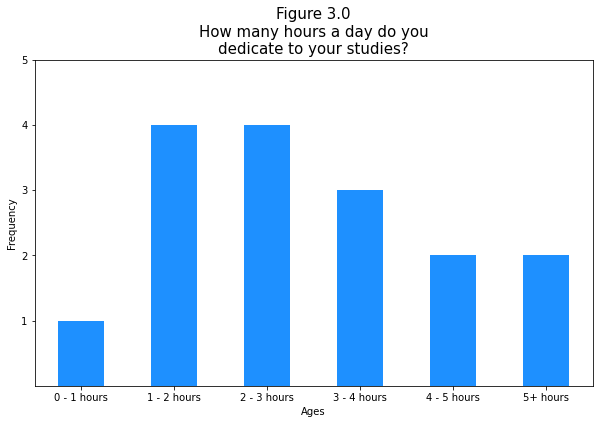

In [62]:
ax2 = df['study_hours'].value_counts(sort = False).plot.bar(rot=0, legend = False,
                                                            color= colour_scale[4], 
                                                            fontsize=10, figsize = (10,6), 
                                                            yticks = [1,2,3,4,5])

ax2.set_xlabel('Ages')
ax2.set_ylabel('Frequency')
ax2.set_title('Figure 3.0\nHow many hours a day do you\ndedicate to your studies?',fontsize=15)
plt.show()

>Bar chart above shows that daily study times are more prominent in the range between **1 to 3 hours** per day as **8/16** students are part of this range.

#### **How often do you do the following: Delay studies and lose focus**


In [63]:
df = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',                    
                   usecols = 'L, M')
df['sm_delay_studies'].value_counts()
rating_val = ['Null','Never', 'Rarely', 'Sometimes', 'Often', 'Always'] #setting ordinal values
q_name = ['sm_delay_studies', 'sm_notif_focus',] 
df_melt = df.melt(var_name='q_type', value_name='answer')

df_melt['answer']= df_melt['answer'].astype(pd.CategoricalDtype(
                                            categories=rating_val,
                                            ordered=True))

focus_norm = pd.crosstab(df_melt['q_type'],df_melt['answer'], normalize='index')*100 
#focus_norm

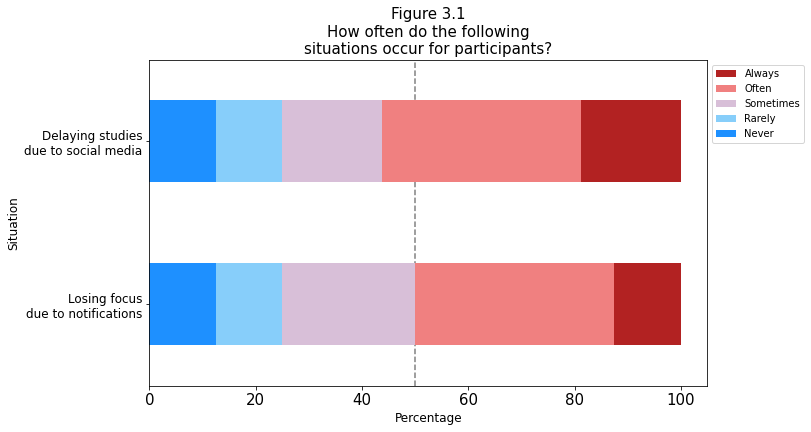

In [64]:

ax = focus_norm.plot.barh(stacked=True, 
                          color=reversed(colour_scale), 
                          figsize=(10,6),
                          fontsize=15)
# Manually draw legend: reverse order of labels and plot outside axes.
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.0, 1.0))
ax.axvline(50, linestyle='--', color='black', alpha=.5, zorder=-1)
ax.set_xlabel('Percentage',fontsize=12)
ax.set_ylabel('Situation',fontsize=12)
y_labels = ['Losing focus\ndue to notifications',
            'Delaying studies\ndue to social media']
ax.set_yticklabels(y_labels, fontsize=12)
ax.set_title('Figure 3.1\nHow often do the following\nsituations occur for participants?',fontsize=15)

plt.show()

>Although always and often are more prominent, the graph doesn't explicitly show how participants behave so below I have aggregated categories for a clearer yes or no.

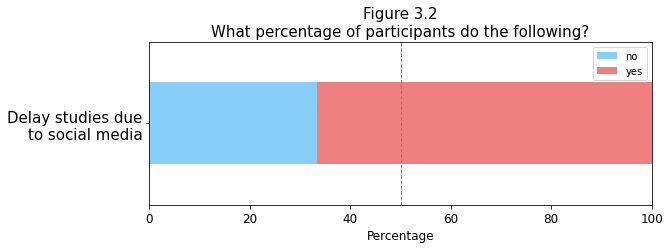

In [65]:
# Aggregating categories
# read required columns to df_pn
df_pn = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',                    
                   usecols = 'L, M')
# oject for mapping the categories to either yes or no
pos_neg = {'Always': 'yes','Often': 'yes',
         'Sometimes': np.NaN,
         'Rarely': 'no', 'Never': 'no'}
# mapping the 5 categories to positive, negative or NaN
df['delay_pos_neg'] = df['sm_delay_studies'].map(pos_neg)
df['notif_pos_neg'] = df['sm_notif_focus'].map(pos_neg)
# setting and ordering category, excluding Nan Values previously created
df['delay_pos_neg'] = df['delay_pos_neg'].astype(pd.CategoricalDtype(
                                          categories=['no', 'yes'], ordered=True))
df['notif_pos_neg'] = df['notif_pos_neg'].astype(pd.CategoricalDtype(
                                          categories=['no', 'yes'], ordered=True))
# creating a table with the sum of pos and neg
table = df['delay_pos_neg'].value_counts(sort=False)
table2 = df['notif_pos_neg'].value_counts(sort=False)
# converting to percentage rather than frequency
pc = table / table.sum() * 100
# plotting the dataframe as a stacked bar chart
ax = pc.to_frame().T.plot.barh(stacked=True, color=[colour_scale[3],colour_scale[1]],figsize=(9,3), fontsize=12)
# setting title, midway line
ax.set_title('Figure 3.2\nWhat percentage of participants do the following?', fontsize=15)
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1)
ax.legend(bbox_to_anchor=(1.0, 1.0))
# set xlim to get rid of gap in x axis
ax.set_xlim(0, 100)
ax.set_yticklabels(['Delay studies due\nto social media'],fontsize=15)
ax.set_xlabel('Percentage',fontsize=12)
plt.show()


>The figure above shows that roughly **65%-70%** of participants delay their studies to spend more time on social media.

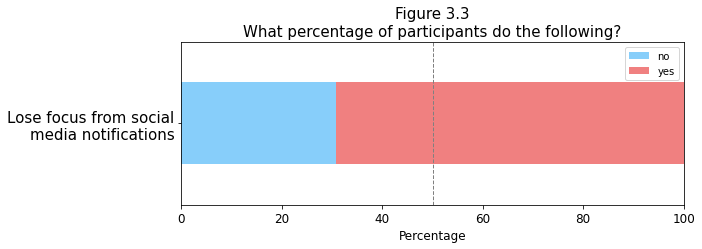

In [66]:
pc2 = table2 / table2.sum() * 100
ax = pc2.to_frame().T.plot.barh(stacked=True, 
                                color=[colour_scale[3],colour_scale[1]],
                                figsize=(9,3), fontsize=12)
ax.set_title('Figure 3.3\nWhat percentage of participants do the following?', fontsize=15)
ax.axvline(50, color='grey', linestyle='dashed', linewidth=1)# line through the middle
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlim(0, 100)# set xlim to get rid of gap in x axis
ax.set_yticklabels(['Lose focus from social\nmedia notifications'], fontsize=15)
ax.set_xlabel('Percentage',fontsize=12)
plt.show()

>**70%** of students lose their focus on studies always or often when they get notifications from their social media applications.

##### **Cat plot: Delaying studies and age**

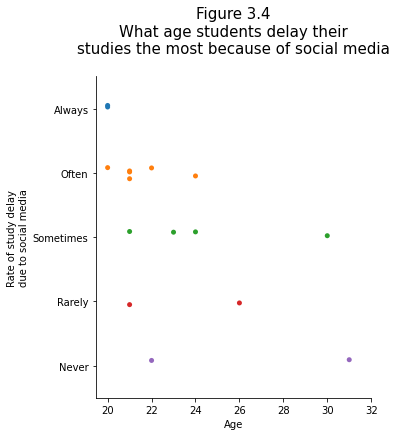

In [67]:
r1 = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',
                   usecols = 'L, B')

r1['sm_delay_studies'] = r1['sm_delay_studies'].astype('category')

# Calculate the median age of each group for ordering categories.

g = sb.catplot(x='age', y='sm_delay_studies',data=r1,
               order=['Always','Often','Sometimes','Rarely','Never'])
g.ax.set_title('Figure 3.4\nWhat age students delay their\nstudies the most because of social media\n',fontsize=15)
g.ax.set_xlabel('Age',fontsize=10)
g.ax.set_ylabel('Rate of study delay\ndue to social media',fontsize=10)
plt.xticks([20,22,24,26,28,30,32])

plt.show()

>Chart above shows that people younger than 26 are more likely to delay their studies and stay longer on social media, while people that are over 28 delay their studies just sometimes or never.

#### **Do you agree or disagree with the following statement: "Social media makes it harder to focus on my studies."**

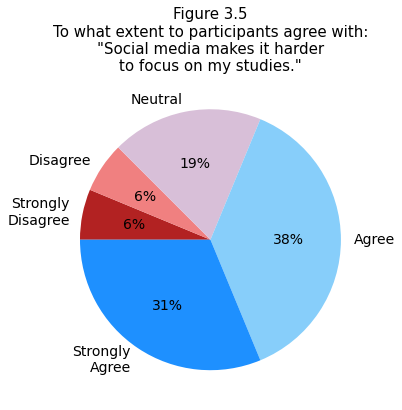

In [68]:
df = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',
                   dtype = {
                        'sm_delay_studies':'category',
                        'sm_notif_focus':'category',
                        'sm_focus':'category'},
                   usecols = 'K, L, M, N, B')
ax2 = df['sm_focus'].value_counts(sort = False).plot.pie(autopct='%1.0f%%',
                                                         startangle=180,
                                                         counterclock=False,
                                                         labels=['Strongly\nDisagree',
                                                                 'Disagree','Neutral',
                                                                 'Agree','Strongly\nAgree'],
                                                         colors = colour_scale,
                                                         fontsize=14,
                                                         figsize = (10,6))
ax2.set_ylabel('')
ax2.set_title(
    'Figure 3.5\nTo what extent to participants agree with:\n"Social media makes it harder\nto focus on my studies."',
    fontsize=15)
plt.show()

>Pie chart shows that majority of students (**69%**) agree that social media makes it harder to focus on studies. Only **12%** said that they disagree with the statement.

##### **Box plot: Focus levels against the level of education**

**Key for upcoming plots:**  
Focus levels & meaning

- 1 = No focus  
- 2 = Slight focus  
- 3 = Neutral   
- 4 = Good focus  
- 5 = High Focus  



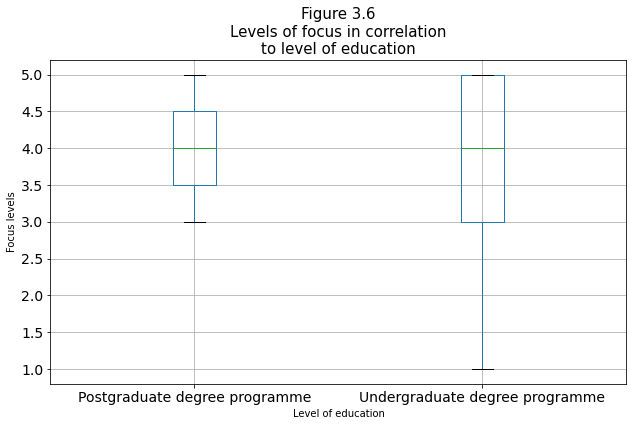

In [69]:
focusplot = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',
                   usecols = ['education', 'sm_focus'])
#print(focusplot) #uncomment to see table used for boxplot

median_value = focusplot.groupby('education').median().sort_values(
by='sm_focus', ascending=False)
# Create a new data type where platforms are ordered by median age.
ordered_platform_dtype = pd.CategoricalDtype(median_value.index, ordered=True)
# Assign new ordered categorical dtype.
focusplot['education'] = focusplot['education'].astype(ordered_platform_dtype)
ax = focusplot.boxplot(by='education', fontsize=14, figsize = (10,6))
ax.set_title('Figure 3.6\nLevels of focus in correlation\nto level of education', fontsize=15)
ax.figure.suptitle('')
ax.set_xlabel('Level of education')
ax.set_ylabel('Focus levels')
plt.show()

>- **Middle 50%** (IQR) of postgraduate students is smaller than Undergraduate students.
>- Undergraduate plot is **negatively skewed** as whisker tends towards bottom end.
>- **No outliers** present.
>- Quartile 3 in undergraduate plot coincides with max whisker due to data being **discrete** and **small**.

### **3. To what extent the use of social media influences people’s thinking about future careers?**

---

In [70]:
#visualisation of the dataset being used for this research question. 
res3 = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses', 
                   usecols = 'O, P, Q' #the relevent columns required 
                   )

#res3 #can be run to view all 16 responses
#Variable named res3 indicating research question 3 - To what extent the use of social media 
#influences people’s thinking about future careers?


#### **Do you follow people or accounts on social media in the job sector/career of your interest?**

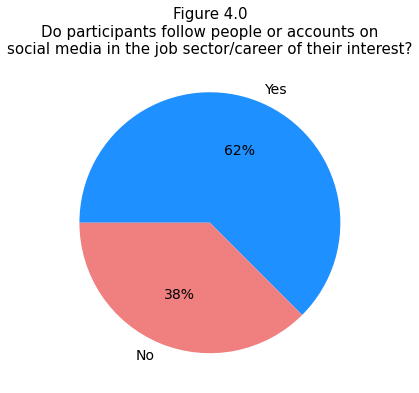

In [71]:
fc = res3['sm_career_follow'].value_counts().plot.pie(autopct='%1.0f%%', #regulating the percentage size
                                          startangle=180, #rotates the start of the pie chart by angle degrees counterclockwise
                                          colors = [colour_scale[4],colour_scale[1]], 
                                          counterclock=False, #no fractional direction
                                          label='',
                                          fontsize=14, #size of the font
                                          figsize=(10,6))
fc.set_title(
    'Figure 4.0\nDo participants follow people or accounts on\nsocial media in the job sector/career of their interest?',
    fontsize=15)
plt.show()

>**62%** of respondents follow accounts on social media in their career field of interest.  
No respondents selected the '**Maybe**' option reinforcing that the question left no ambiguity and was concise.  
**Majority** of respondents follow *at least one* account or person in the job sector of their interest.

#### **Approximately, how many accounts related to your career prospects do you follow across your social media platforms?**

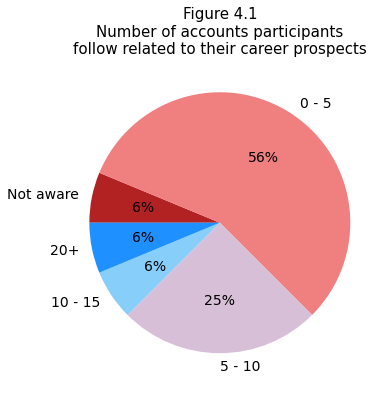

In [72]:
val = ['Not aware','0 - 5','5 - 10','10 - 15','20+']
res3['sm_career_follow_num'] = pd.Categorical(res3['sm_career_follow_num'], 
                                            categories = val, ordered=True)
fc = res3['sm_career_follow_num'].value_counts(sort=False).plot.pie(autopct='%1.0f%%', #regulating the percentage size
                                          startangle=180, # rotates the start of the pie chart by angle degrees counterclockwise
                                          colors = colour_scale, #chosen names of colors supported in matplotlib
                                          counterclock=False, #no fractional direction 
                                          label='',
                                          figsize=(10,6), #general size of the chart
                                          fontsize=14 )#size of the font
fc.set_title('Figure 4.1\nNumber of accounts participants\nfollow related to their career prospects',
             fontsize=15)
plt.show()

>The majority of people (**56%**) only follow between **1-5** accounts, and **12%** of people follow more than **10 accounts**.  
**6%** of respondents are not aware of their answer.   
At least **90%** of people *actively* interact with/follow such accounts.

##### **Cat plot: Plotting participants following accounts in the job of their interest against securing a placement**

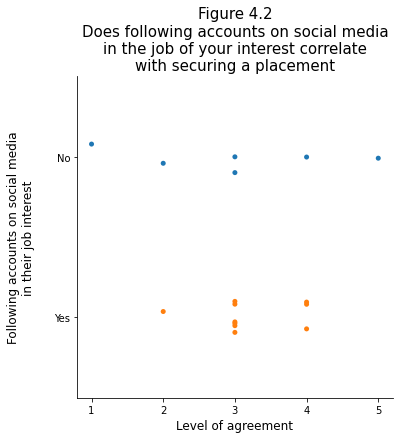

In [73]:
jobint = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',
                   usecols = 'O,V')

jobint['sm_career_follow'] = jobint['sm_career_follow'].astype('category')

g = sb.catplot(x='sm_career_chances', y='sm_career_follow', data=jobint)
g.ax.set_title(
    'Figure 4.2\nDoes following accounts on social media\nin the job of your interest correlate\nwith securing a placement',
    fontsize=15)
g.ax.set_ylabel('Following accounts on social media\nin their job interest\n', fontsize=12)
g.ax.set_xlabel('Level of agreement',fontsize=12)
plt.xticks([1,2,3,4,5])
plt.show()

>**Majority** are **neutral** as to whether they believe social media can aid in securing a placement. Therefore, following people on social media in your job interest does not have a direct influence on securing a placement.

#### **Do you agree or disagree with the following statement: "Social media posts and accounts have influenced my future career prospects and decision making."**

In [74]:
#create dataframe and gather data from excel file, specifying sheet name and use of columns
Influence_Career = pd.read_excel('Survey_Data_Vis.xlsx',
                         sheet_name ='responses',
                         usecols ='Q')
#
Influence_Career = Influence_Career.melt(var_name = 'Total responses', value_name = 'agreement')

#Data has been gathered as numerical values
#For the purpose of visualisations, numerical data will be converted to 
#ordinal likert scale using pd.astype into categroies
labelx =[1,2,3,4,5]
labely =['Strongly Disagree','Disagree', 'Neutral','Agree','Strongly Agree']
Influence_Career['agreement'] = Influence_Career['agreement'].astype(pd.CategoricalDtype(
    categories = labelx,
    ordered = True
))
#build a cross-tabulation table that show the frequency in which data appear in certain groups
Influence_Career_table = pd.crosstab(Influence_Career['Total responses'], Influence_Career['agreement'])
Influence_Career_table.columns =labely
#Influence_Career_table uncomment to check the count of responses

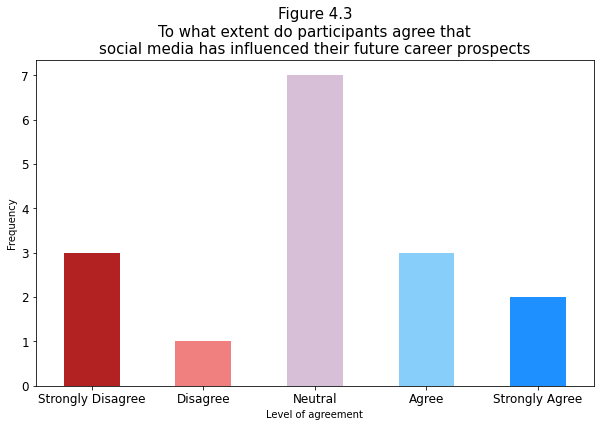

In [75]:
#function sum() used to sum the values shown in Figure 1.2
bar = Influence_Career_table.sum().plot.bar(legend=False, 
                                            rot=0, fontsize=12, 
                                            color = colour_scale,
                                            figsize=(10,6))
bar.set_ylabel('Frequency',fontsize=10)
bar.set_xlabel('Level of agreement',fontsize=10)
bar.set_title(
'Figure 4.3\nTo what extent do participants agree that\nsocial media has influenced their future career prospects',           
fontsize=15)
plt.show()

>Qualitative data on social media influencing career prospect shows a high level of neutrality (**7/16 neutral** responses), other responses are spread nearly equally across the other options. 

##### **Box plot: Participants future career prospects and decision making influenced by social media measured against age**



In [76]:
#visualisation of the being used for this research question. 
res3 = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses', 
                   usecols = 'B, Q' #the relevent columns required 
                   )

#res3 #can be run to view all 16 responses
#Variable named res3 indicating research question 3 - To what extent the use of social media 
#influences people’s thinking about future careers?


**Key for upcoming plots:**  
Focus levels & meaning

- 1 = Strongly disagree  
- 2 = Disagree  
- 3 = Neutral 
- 4 = Agree  
- 5 = Strongly agree  

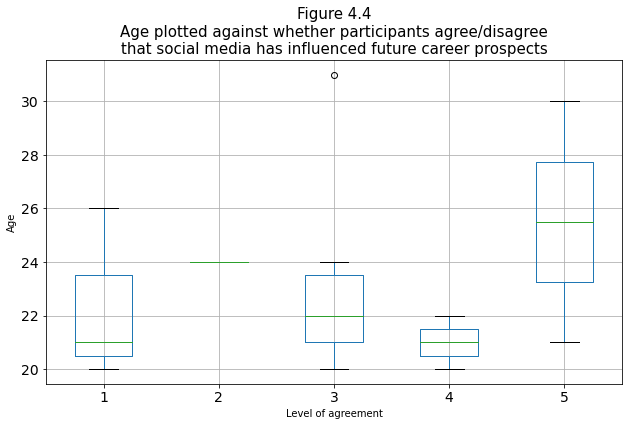

In [77]:
# Calculate the median age.
median_age = res3.groupby('influence_career').median().sort_values(
by='age', ascending=False)
#print(median_age)
# Assign ordered categorical dtype.
res3['influence_career'] = pd.Categorical(res3['influence_career'], categories=[1,2,3,4,5], ordered=True)
ax = res3.boxplot(by='influence_career', fontsize=14,figsize=(10,6))
ax.set_title(
    'Figure 4.4\nAge plotted against whether participants agree/disagree\nthat social media has influenced future career prospects',
    fontsize=15)
ax.figure.suptitle('')
ax.set_xlabel('Level of agreement')
ax.set_ylabel('Age')
plt.show()

>**Older respondents** were more likely have their future career prospects influenced by social media.   
"**Strongly Agree**" has largest data distribution, and "**Disagree**" has very little distribution.   
Strongly agree has the highest **median** and largest **Interquartile Range** compared to the rest of the plots.  
There is an **outlier** present on the **neutral** category due to an older age

### **4. How is social media affecting your ability to access career opportunities?**

---



#### **Do you regard social media as a tool for finding career opportunities of your interest?**

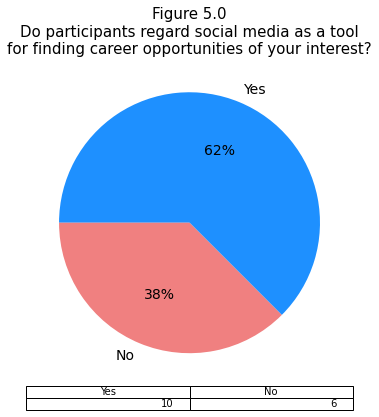

In [78]:
#plot pie chart on data from 'career_tool' column 
df = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses')
ax = df['career_tool'].value_counts().plot.pie(autopct='%1.0f%%',
                                            startangle=180,
                                            counterclock=False,
                                            table=True, 
                                            label='',
                                            colors = [colour_scale[4],colour_scale[1]],
                                            figsize = (10,6),
                                            fontsize=14)
ax.set_title(
    'Figure 5.0\nDo participants regard social media as a tool\nfor finding career opportunities of your interest?',
    fontsize=15)
plt.show()

#### **How often has the following occured: Seeing job ad, applying for a job and being approached for a job on social media.**

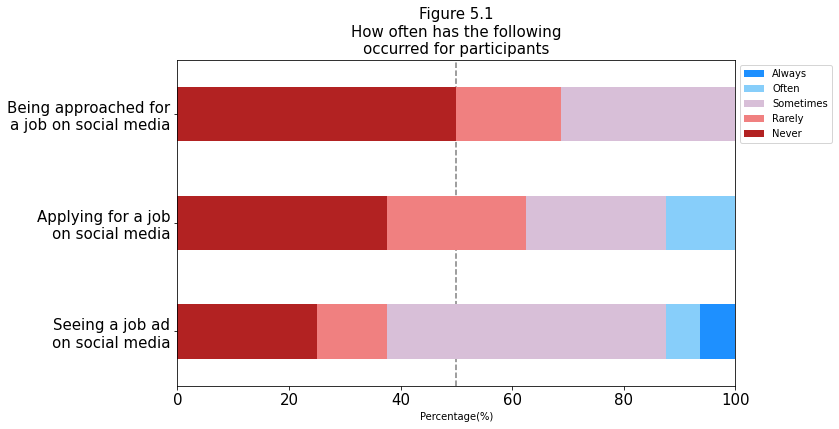

In [79]:
df['job_ad'].value_counts()
rating = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'] #Ordering categorical variables
job_ad_opportunity = ['job_ad', 'applying_ad', 'approached']
df_melt = df.melt(var_name='job_opportunity', value_name='rating')
df_melt['job_opportunity'] = df_melt['job_opportunity'].astype(pd.CategoricalDtype(
                                            categories=job_ad_opportunity,
                                            ordered=True))
df_melt['rating']= df_melt['rating'].astype(pd.CategoricalDtype(
                                            categories=rating,
                                            ordered=True))
#print(df_melt.head())
table = pd.crosstab(df_melt['job_opportunity'],df_melt['rating']) 
table_norm = pd.crosstab(df_melt['job_opportunity'],df_melt['rating'], normalize='index')*100
#print(table_norm) #uncomment to see normalized data 


ax = table_norm.plot.barh(stacked=True, color = colour_scale, fontsize=15, figsize=(10,6))
# Manually draw legend: reverse order of labels and plot outside axes.
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.0, 1.0))
ax.axvline(50, linestyle='--', color='black', alpha=.5, zorder=-1)
ax.set_xlabel('Percentage(%)',fontsize=10)
ax.set_ylabel('')
# array of labels for y tick
ylabels = ['Seeing a job ad\non social media',
       'Applying for a job\non social media',
       'Being approached for\na job on social media']
ax.set_yticklabels(ylabels)
ax.set_xlim(0,100)# gets rid of gap on x axis
ax.set_title('Figure 5.1\nHow often has the following\noccurred for participants',fontsize=15)
plt.show()

>**50%** of respondents were never approached via social media for opportunities. Another prominent proportion of respondents sees job advertisements sometimes on social media. **20%** of respondents often apply via advertisement.

#### **To what extent do you agree or disagree with the following statement: " Social media can considerably increase my chances of securing a career or job placement."**

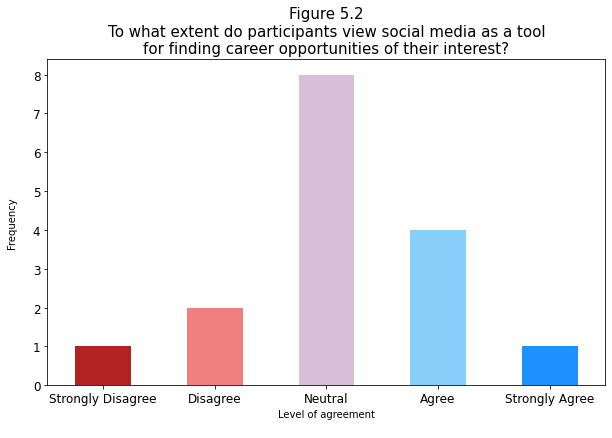

In [80]:
Career_chances = pd.read_excel('Survey_Data_Vis.xlsx',
                         sheet_name ='responses',
                         usecols ='V')


Career_chances = Career_chances.melt(var_name = 'Total responses', value_name = 'agreement')

labelx =[1,2,3,4,5]
labely =['Strongly Disagree','Disagree', 'Neutral','Agree','Strongly Agree']
Career_chances['agreement'] = pd.Categorical(Career_chances['agreement'],
                                            categories = labelx, ordered = True)
#print(Career_chances_table)
Career_chances_table = pd.crosstab(Career_chances['Total responses'], 
                                   Career_chances['agreement'])
Career_chances_table.columns =labely


bar = Career_chances_table.sum().plot.bar(legend=False, rot=0, 
                                          fontsize=12, color = colour_scale,
                                          figsize=(10,6))
bar.set_ylabel('Frequency\n')
bar.set_xlabel('Level of agreement\n')
bar.set_title(
    'Figure 5.2\nTo what extent do participants view social media as a tool\nfor finding career opportunities of their interest?',
    fontsize=15)
plt.show()

>Half of the responses (**8/16**) were **neutral** when participants were asked if social media could be a tool for finding career opportunities, **5/16** agreed with the statement.

##### **Cat plot: Social media's influence on career prospects and decision making against age**

**Key for upcoming plots:**  
Influence rating & meaning

- 1 = Not influenced at all 
- 2 = Slightly influenced
- 3 = Neutral 
- 4 = Influenced 
- 5 = Highly influenced

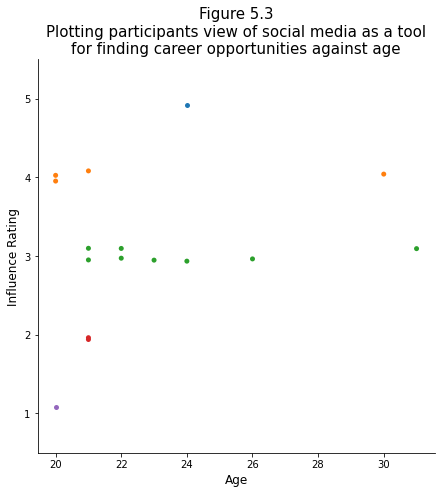

In [81]:
df = pd.read_excel('Survey_Data_Vis.xlsx', 
                    sheet_name = 'responses',                    
                    usecols = 'B, Q, V')
df['influence_career'] = df['influence_career'].astype('category')
df['sm_career_chances']= df['sm_career_chances'].astype('category')

var = sb.catplot(x='age', y='sm_career_chances', 
                data = df, order=[5, 4, 3, 2, 1],
                height=6)
                
var.ax.set_title('Figure 5.3\nPlotting participants view of social media as a tool\nfor finding career opportunities against age', 
                 fontsize=15)
var.ax.set_ylabel('Influence Rating', fontsize=12)
var.ax.set_xlabel('Age', fontsize=12)
var.ax
plt.show()

>Rating 3 which corresponds to **neutral** seems the most consistent across different ages from 20 until 26 years old.


##### **Box plot: Box plot: Social media career influence plotted against gender**

**Key for upcoming plots:**
- 1 = Strongly disagree
- 2 = Disagree
- 3 = Neutral 
- 4 = Agree
- 5 = Strongly agree

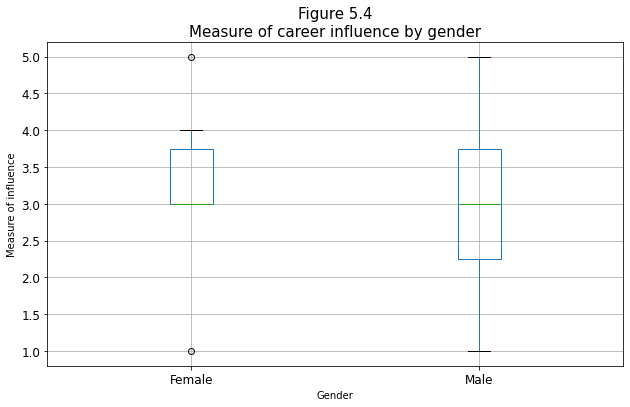

In [82]:
df = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',
                   usecols=['gender', 'influence_career'])

median_value = df.groupby('gender').median().sort_values(
by='influence_career', ascending=False)
# Create a new data type where platforms are ordered by median age.
ordered_platform_dtype = pd.CategoricalDtype(median_value.index, ordered=True)
# Assign new ordered categorical dtype.
df['gender'] = df['gender'].astype(ordered_platform_dtype)
ax = df.boxplot(by='gender', fontsize=12,figsize = (10,6))
ax.set_title('Figure 5.4\nMeasure of career influence by gender', fontsize=15)
ax.figure.suptitle('')
ax.set_xlabel('Gender')
ax.set_ylabel('Measure of influence')
plt.show()

In [83]:
#Calculate skewness
def plot_skew():
      return df['influence_career'].skew().round(2)
    
plot_skew()
#Skewness of box plot = -0.23 indicating a negative value
#This indicates that the value tends more towards the "tail" of data

-0.23

>- Overall **skew** value is negative: **-0.23**
>- **Outliers** present in both ends for Females
>- Male **Interquartile** Range has a **bigger value**
>- **Median** of both box plots is the same = **3**

### **5. How do people think social media performs in terms of educational advertisement?**


---



#### **In what frequency do you receive ads on social media to do with the following?**

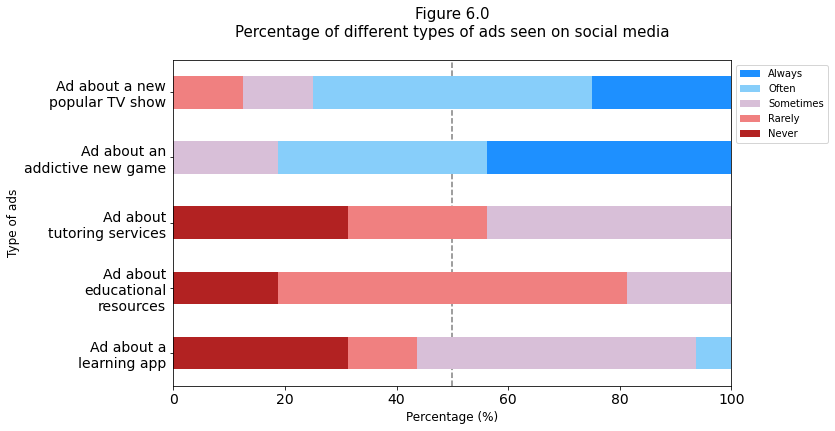

In [84]:
# reading the excel with required columns
df = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',                    
                   usecols = 'W, X, Y, Z, AA')
# Null category for later use with likert plot
rating_val = ['Null','Never', 'Rarely', 'Sometimes', 'Often', 'Always']
ad_name = ['learning_app_ad', 'edu_resources_ad', 'tutor_ad', 'game_ad', 'tv_ad']
# melting dataframe
df_melt = df.melt(var_name='ad_type', value_name='rating')
# ordered as categories a slightly linked
df_melt['ad_type'] = df_melt['ad_type'].astype(pd.CategoricalDtype(
                                            categories=ad_name,
                                            ordered=True))
# ordered ratings category
df_melt['rating']= df_melt['rating'].astype(pd.CategoricalDtype(
                                            categories=rating_val,
                                            ordered=True))
# cross tabulation, normalized to get percentage

table_norm = pd.crosstab(df_melt['ad_type'],df_melt['rating'], normalize='index')*100 
#plotting table of percentages as a stacked chart
ax = table_norm.plot.barh(stacked=True, color = colour_scale, figsize=(10,6), fontsize=14)
# Manually draw legend: reverse order of labels and plot outside axes.
handles, labels = ax.get_legend_handles_labels()
# flipping order of labels in legend
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.0, 1.0))
# drawing dashed line through centre
ax.axvline(50, linestyle='--', color='black', alpha=.5, zorder=-1)
# defining arr of labels, with breakspace
ad_labels = ['Ad about a\nlearning app', 
             'Ad about\neducational\nresources', 
             'Ad about\ntutoring services',
             'Ad about an\naddictive new game',
             'Ad about a new\npopular TV show']
ax.set_yticklabels(ad_labels)# setting the y tick labels to the arr above
# getting rid of the gap on x-axis
ax.set_xlim(0,100)
# x y labels anf title
ax.set_xlabel('Percentage (%)',fontsize=12)
ax.set_ylabel('Type of ads',fontsize=12)
ax.set_title('Figure 6.0\nPercentage of different types of ads seen on social media\n', fontsize=15)
plt.show()

> Roughly **80%** don't receive ads about educational resources, and **40%** - **55%** don't receive any ads about learning apps or services. In contrast, **75%** - **80%** do receive distracting ads regarding addictive new games and TV shows. For better visualisation, I've converted this to a diverging stacked chart too. 





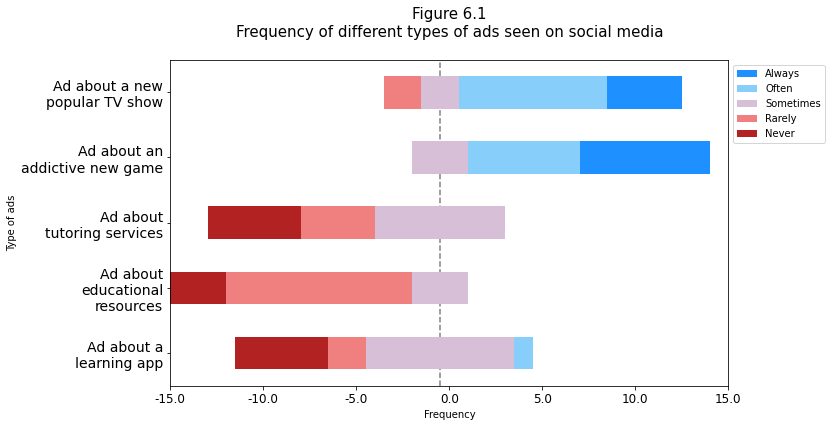

In [85]:
table = pd.crosstab(df_melt['ad_type'],df_melt['rating']) 
ad_likert = table.copy()
likert(ad_likert)
ad_labels = ['Ad about a\nlearning app', 
             'Ad about\neducational\nresources', 
             'Ad about\ntutoring services',
             'Ad about an\naddictive new game',
             'Ad about a new\npopular TV show']

handles, labels = ax.get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.0, 1.0))
plt.xlabel('Frequency')
plt.ylabel('Type of ads')
plt.yticks(np.arange(5),labels=ad_labels,fontsize=14)
plt.title('Figure 6.1\nFrequency of different types of ads seen on social media\n', fontsize=15)
plt.show()

>The diverging stacked chart explicitly shows ads to do with learning and education are leaning significantly to the **left/negative** and this shows that overall, participants **receive more distracting ads** that can affect their education in a negative way. 

---



#### **How likely are you to visit and/or download an educational app from an ad?**

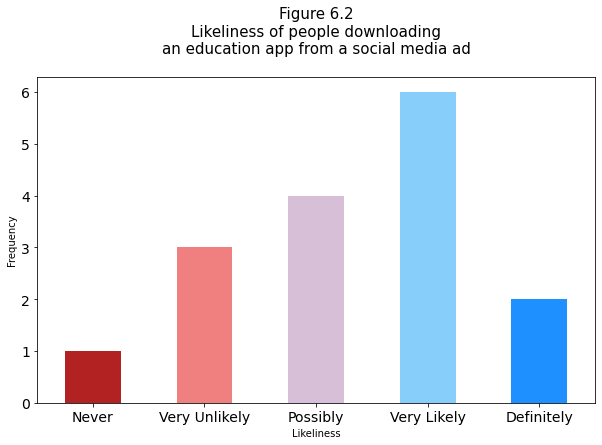

In [86]:
df = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',                    
                   usecols = 'AB')
# reading the required columns to df
# melting dataframe
df_melt = df.melt(var_name='educational_app', value_name='likelihood')
# array of numbers for defining categories
val_a = [1, 2, 3, 4, 5]
# array of category names
likely_val = [ 'Never', 'Very Unlikely', 'Possibly', 'Very Likely', 'Definitely']
# setting dtype as category with the numbers array..
# ..as the data collected ranges from 1 - 5 instead of never-definetly etc.
df_melt['likelihood']= df_melt['likelihood'].astype(pd.CategoricalDtype(
                                            categories = val_a,
                                            ordered = True))
# cross tabulation to get desired format of rows and columns
edu_app_table = pd.crosstab(df_melt['educational_app'], df_melt['likelihood'])
# finally switching column names from 1-5 to never-definetly
edu_app_table.columns = likely_val
# plotting the sum of all cat. in a bar chart
ax = edu_app_table.sum().plot.bar(legend=False,
                                  rot=0, 
                                  fontsize = 14, 
                                  color = colour_scale, 
                                  figsize = (10,6))
# setting labels and title
ax.set_ylabel('Frequency')
ax.set_xlabel('Likeliness')
ax.set_title('Figure 6.2\nLikeliness of people downloading\nan education app from a social media ad\n',fontsize=15)
plt.show()

> As seen above, **8/16** participants would indeed download an educational app from an ad on social media and **4/16** participants would not. This data was also plotted against the age of participants below.


##### **Cat plot: Plotting the likelihood of participants downloading an educational app from social media againts their age**

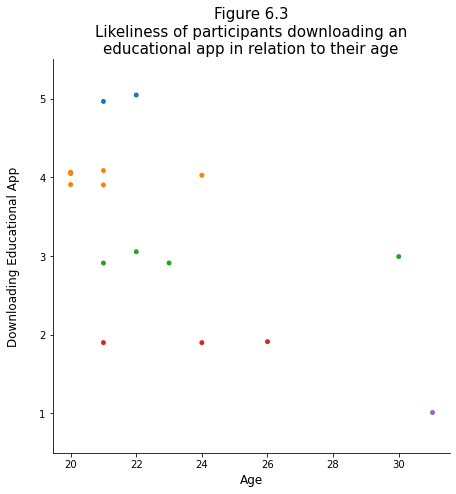

In [87]:
# reading the data age and liklehood of downloading and educational app
df = pd.read_excel('Survey_Data_Vis.xlsx', 
                    sheet_name = 'responses',                    
                    usecols = 'B, AB')
#setting the dtype as cetgory
df['download_edu_app'] = df['download_edu_app'].astype('category')
# plotting the likelihood against age using seaborn catplot
# also setting order and height of figure
g = sb.catplot(x='age', y='download_edu_app', 
               data = df, order=[5, 4, 3, 2, 1],
                height=6)
# setting title and labelwith breakspace and font size
g.ax.set_title('Figure 6.3\nLikeliness of participants downloading an\neducational app in relation to their age', 
               fontsize=15)
g.ax.set_ylabel('Downloading Educational App\n', fontsize=12)
g.ax.set_xlabel('Age', fontsize=12)
plt.show()

>You can see a subtle **negative correlation** showing younger participants are more likely to download an educational app from an ad on social media.  
This poses an interesting question of whether this id because older participants' perception of social media and ads are different to younger participants.




**Key for cat plot above.**
Influence rating & meaning

>- 1 = Never 
>- 2 = Very unlikely
>- 3 = Possibly
>- 4 = Very likely
>- 5 = Definetely 

#### **Which statement do you most agree with: Found useful apps though ads, ads are more distracting than useful or never cared for ads**

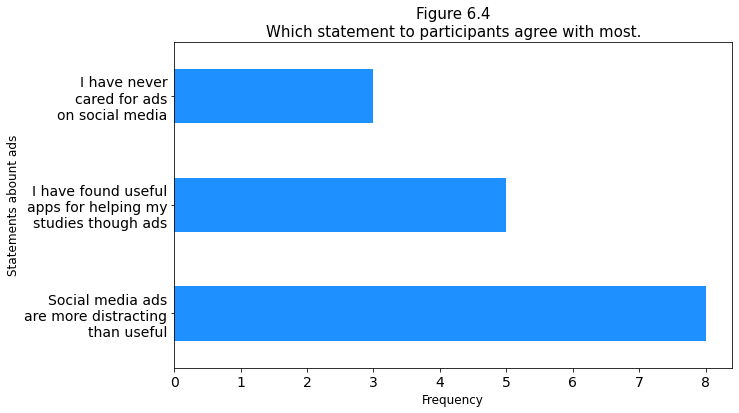

In [88]:
df = pd.read_excel('Survey_Data_Vis.xlsx', 
                   sheet_name = 'responses',                    
                   usecols = 'AC')
# plotting the value count of statements as a horizontal bar chart
ax= df.value_counts().plot.barh(fontsize=14,
                                figsize=(10,6),
                                color=colour_scale[4])
# array of the statements for the y tick labels
# with breakspace \n
statements = ['Social media ads\nare more distracting\nthan useful', 
              'I have found useful\napps for helping my\nstudies though ads', 
              'I have never\ncared for ads\non social media']
# setting title and labels
ax.set_xlabel('Frequency',fontsize=12)
ax.set_ylabel('Statements abount ads',fontsize=12)
ax.set_yticklabels(statements)
ax.set_title('Figure 6.4\nWhich statement to participants agree with most.', fontsize = 15)
plt.show()

>**8/16** participants agreed with the statement about ads being more **distracting** than useful linking to **figure 6.1** which show exactly that. **5/16** found useful apps through ads showing that even with ads being distracting for others, they found the use in them.

## **Conclusion**
---
---


Summary of key findings from each research question 

-	Obtained results show that the number of social media accounts is not a pivotal element for the survey respondent to be satisfied about academic performance. 
-	Data distribution models show people that dedicate less time to daily studies are less academically satisfied.
-	Participants receive more ads that negatively affect their education and distract them rather than further their development, and would like to receive more useful ads
-	Across participants, the age group that delays study time more frequently are between 20-22. The same age range regards social media as an obstacle to study the most. 
-	63% of participants follow social media accounts related to their career prospect. The data also shows a high level of indecision and neutrality about social media as a means of thinking about future careers. 
-	62% of respondents regard social media as a career opportunities tool finder, from our result it emerges that social media used by participants sponsor opportunities, but does not approach individuals directly. 


Evaluation and enhancements for future research 

The data that has been collected is very discrete and the sample is relatively small – 16 respondents challenged to maximise the visualisation aspects of graphs such as box plots and cat plots. In some box plots, Q3 was equal to the max whisker (due to discrete data). 

Some questionnaire questions could have been worded differently, there is a small leading bias in "I feel like spending less time on social media can improve my university marks.", which could influence participant’s thinking process.

Some data could have produced better insights if collected in other formats I.e. 1,2,3,4, 5+  (5+ cannot be casted into integer, therefore it had to be treated as categorical ordinal data type instead of numerical).




## **Appendix**
---
---

<table >
  <tr>
    <th></th>
    <th>source</th> 
  </tr>

  <tr>
    <td>Ai</td>
    <td><a>https://hilo.hawaii.edu/campuscenter/hohonu/volumes/documents/TheEffectsofSocialMediaonCollegeStudentsTerriPinyerd.pdf</a></td>
  </tr>

  <tr>
    <td>Aii</td>
    <td><a>https://scholarsarchive.jwu.edu/cgi/viewcontent.cgi?article=1004&context=mba_student</a></td>
  </tr>

  <tr>
    <td>Aiii</td>
    <td><a>https://commons.marymount.edu/tbanner/2019/02/05/the-effects-of-social-media-and-technology-on-college-students/</a></td>
  </tr>

  <tr><td></td><td></td></tr>

  <tr>
    <td>B</td>
    <td>[Group 11 Google Form Survey] <a>https://forms.gle/PwS4qmS9pHPVyBxk9</a></td>
  </tr>

  <tr>
    <td></td>
    <td></td>
  </tr>
</table>
